In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [3]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
# Convert to DataFrame for convenience
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
# Export the iris dataset as an excel chart
df.iloc[0:1000].to_excel('iris_v0.xlsx', index=True)

In [6]:
# As the target varibles (species name) column is missing--
# so we have to insert that
df['species'] = iris.target

In [7]:
# Export all the rows to a Excel File (XLSX format)
df.iloc[0:1000].to_excel('iris_v1.xlsx', index=True)

In [8]:
# Map target values to species names for better understanding
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [9]:
# Export all the rows to a Excel File (XLSX format)
df.iloc[0:1000].to_excel('iris_v2.xlsx', index=True)

In [10]:
# Features and target
X = df.drop('species', axis=1)
y = df['species']

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=52)

In [12]:
# Create an SVM model
svm = SVC()

In [13]:
# Fit the model to the training data
svm.fit(X_train, y_train)

SVC()

In [14]:
# Predict using the test set
y_pred = svm.predict(X_test)
print(y_pred)

['setosa' 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'seto

In [15]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30  0  0]
 [ 0 34  2]
 [ 0  5 34]]


In [16]:
# Generate classification report & Accuracy Score
class_report = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)
print(f"\n ACCURACY SCORE = {acc_score*100:.2f}%")

Confusion Matrix:
 [[30  0  0]
 [ 0 34  2]
 [ 0  5 34]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
  versicolor       0.87      0.94      0.91        36
   virginica       0.94      0.87      0.91        39

    accuracy                           0.93       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.93      0.93       105


 ACCURACY SCORE = 93.33%


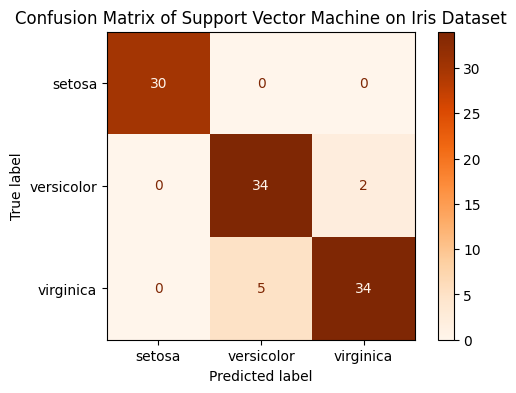

In [19]:

# Set figure size
fig, ax = plt.subplots(figsize=(6, 4))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Oranges', ax=ax)
plt.title("Confusion Matrix of Support Vector Machine on Iris Dataset")
plt.show()

In [20]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

In [21]:
# Create a GridSearchCV object # Support Vector Classifier (SVC)
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [22]:
# Print the best parameters and the best score
print("Best Parameters:\n", grid_search.best_params_)
print(f"\nBest Cross-Validation Score = {grid_search.best_score_ *100:.2f}%")

Best Parameters:
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

Best Cross-Validation Score = 100.00%


In [24]:
# Predict with the best estimator
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Calculate confusion matrix for the best estimator
cm_best = confusion_matrix(y_test, y_pred_best)
print(cm_best)

[[30  0  0]
 [ 1 33  2]
 [ 0  2 37]]


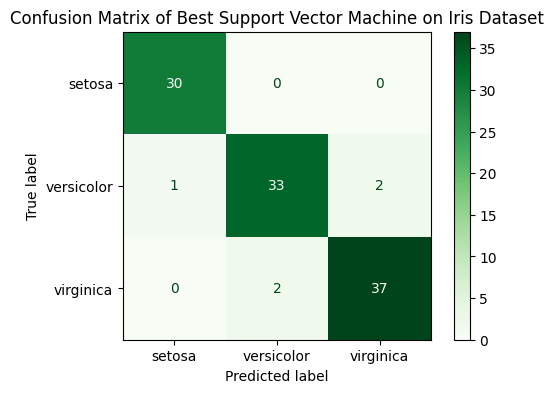

In [25]:
# Plot the confusion matrix
# Set figure size
fig, ax = plt.subplots(figsize=(6, 4))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=svm.classes_)
disp.plot(cmap='Greens', ax=ax)
plt.title("Confusion Matrix of Best Support Vector Machine on Iris Dataset")
plt.show()

In [26]:
# Generate classification report & Accuracy Score for the best estimator
class_report_best = classification_report(y_test, y_pred_best)
acc_score_best = accuracy_score(y_test, y_pred_best)
print("Confusion Matrix (Best Estimator):\n", cm_best)
print("\nClassification Report (Best Estimator):\n", class_report_best)
print(f"\n ACCURACY SCORE (Improved): {acc_score_best*100:.2f}%")

Confusion Matrix (Best Estimator):
 [[30  0  0]
 [ 1 33  2]
 [ 0  2 37]]

Classification Report (Best Estimator):
               precision    recall  f1-score   support

      setosa       0.97      1.00      0.98        30
  versicolor       0.94      0.92      0.93        36
   virginica       0.95      0.95      0.95        39

    accuracy                           0.95       105
   macro avg       0.95      0.96      0.95       105
weighted avg       0.95      0.95      0.95       105


 ACCURACY SCORE (Improved): 95.24%
